In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from skimage.feature import hog
from skimage import io, color
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
import pickle
import random

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import os

import shutil
from sklearn.model_selection import train_test_split


print(torch.__version__)
print(torchvision.__version__)

/tmp/ipykernel_7473/1934109255.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2.4.0+cu121
0.19.0+cu121


In [2]:
data_dir = 'data'
train_dir = 'train_data'
test_dir = 'test_data'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each class
for class_name in os.listdir(data_dir):
    print(class_name)
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    
    # Split the data
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create class directories in train and test directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # Move the images to the respective folders
    for image in train_images:
        shutil.move(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))
        
    for image in test_images:
        shutil.move(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),               # Resize images to 32x32
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
    transforms.RandomHorizontalFlip(),         # Randomly flip images horizontally
    transforms.ToTensor(),                     # Convert images to PyTorch tensors (C, H, W)
    transforms.Normalize([0.5], [0.5])         # Normalize grayscale images with mean=0.5, std=0.5
])

In [4]:
test_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

In [5]:
train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)

In [6]:
len(train_data), len(test_data)

(60000, 15000)

In [7]:
class_names =train_data.classes
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [9]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
image,label=train_data[0]
image,label

(tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9843, -0.9843, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9922, -1.0000, -1.0000]]]),
 0)

In [11]:
image.shape,label

(torch.Size([1, 32, 32]), 0)

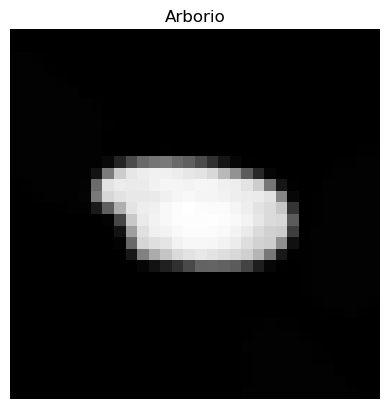

In [12]:
image,label=train_data[0]
image = image.permute(1, 2, 0)
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis("off")
plt.show()

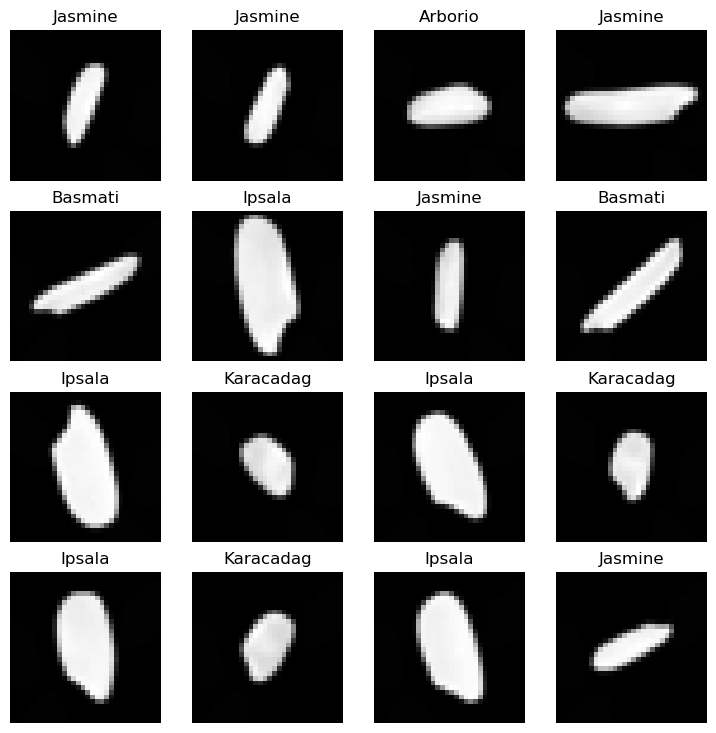

In [13]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    img=img.permute(1,2,0)
    plt.imshow(img,cmap='gray')
    plt.title(class_names[label])
    plt.axis("off")
plt.show()

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x740ae3f74f70>,
 <torch.utils.data.dataloader.DataLoader at 0x740ae3f76290>)

In [15]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 32, 32]), torch.Size([32]))

In [16]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper functions already downloaded")
else:
  print("Downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper functions already downloaded


In [17]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [18]:
y_train =[]
y_test = []

for batch_images, batch_labels in train_dataloader:
    for label in batch_labels:
        y_train.append(label)
y_train=np.array(y_train)

for batch_images, batch_labels in test_dataloader:
    for label in batch_labels:
        y_test.append(label)
y_test=np.array(y_test)


In [19]:
import numpy as np
from skimage.transform import resize
from skimage.color import rgb2hsv

def extract_color_histogram_batch(dataloader, bins=32):
    color_features_list = []

    for batch_images, batch_labels in dataloader:
        for img in batch_images:
            img_np = img.permute(1, 2, 0).numpy()  # Convert from PyTorch tensor to NumPy array
            img_resized = resize(img_np, (32, 32))  # Resize for consistency

            # Calculate color histogram (assuming the image is in RGB format)
            hist = np.histogram(img_resized, bins=bins, range=(0, 1))[0]
            color_features_list.append(hist)

    return np.array(color_features_list)

# Extract color histograms for training dataset
X_color_train = extract_color_histogram_batch(train_dataloader)

# Extract color histograms for testing dataset (optional)
X_color_test = extract_color_histogram_batch(test_dataloader)


In [20]:
import numpy as np
from skimage.feature import hog
from skimage.transform import resize

def extract_hog_features_batch(dataloader):
    hog_features_list = []

    for batch_images, batch_labels in dataloader:
        for img in batch_images:
            img_np = img.permute(1, 2, 0).numpy()  # Convert from PyTorch tensor to NumPy array
            if img_np.shape[-1] == 1:
                img_np = img_np.squeeze(axis=-1)  # Remove the channel dimension if grayscale
            img_resized = resize(img_np, (32, 32))  # Resize the image to a fixed size
            hog_features, hog_image = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            hog_features_list.append(hog_features)

    return np.array(hog_features_list)

# Extract HOG features for training dataset
X_hog_train = extract_hog_features_batch(train_dataloader)

# Extract HOG features for testing dataset (optional)
X_hog_test = extract_hog_features_batch(test_dataloader)


In [21]:
import numpy as np
from skimage.filters import sobel
from skimage.transform import resize

def extract_edge_features_batch(dataloader, bins=64):
    edge_features_list = []

    for batch_images, batch_labels in dataloader:
        for img in batch_images:
            img_np = img.permute(1, 2, 0).numpy()  # Convert from PyTorch tensor to NumPy array
            if img_np.shape[-1] == 1:
                img_np = img_np.squeeze(axis=-1)  # Remove channel dimension if grayscale

            img_resized = resize(img_np, (32, 32))  # Resize for consistency

            # Apply Sobel edge detection
            edges = sobel(img_resized)
            edge_hist = np.histogram(edges, bins=bins, range=(0, 1))[0]
            edge_features_list.append(edge_hist)

    return np.array(edge_features_list)

# Extract Sobel edge features for training dataset
X_edge_train = extract_edge_features_batch(train_dataloader)

# Extract Sobel edge features for testing dataset (optional)
X_edge_test = extract_edge_features_batch(test_dataloader)


In [22]:
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.transform import resize

def extract_lbp_features_batch(dataloader, P=8, R=1, bins=10):
    lbp_features_list = []

    for batch_images, batch_labels in dataloader:
        for img in batch_images:
            img_np = img.permute(1, 2, 0).numpy()  # Convert from PyTorch tensor to NumPy array
            if img_np.shape[-1] == 1:
                img_np = img_np.squeeze(axis=-1)  # Remove channel dimension if grayscale
            
            img_resized = resize(img_np, (32, 32))  # Resize for consistency
            
            # Apply Local Binary Pattern (LBP)
            lbp = local_binary_pattern(img_resized, P=P, R=R, method="uniform")
            
            # Compute the histogram of LBP
            (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, bins + 1), range=(0, bins))
            
            # Normalize the histogram
            hist = hist.astype("float")
            hist /= (hist.sum() + 1e-7)  # Add small value to avoid division by zero
            
            lbp_features_list.append(hist)

    return np.array(lbp_features_list)

# Extract LBP features for training dataset
X_lbp_train = extract_lbp_features_batch(train_dataloader)

# Extract LBP features for testing dataset (optional)
X_lbp_test = extract_lbp_features_batch(test_dataloader)


/home/bhaskar/.local/lib/python3.10/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [23]:
import numpy as np
from skimage.filters import gabor
from skimage.transform import resize

def extract_gabor_features_batch(dataloader, frequency=0.6):
    gabor_features_list = []

    for batch_images, batch_labels in dataloader:
        for img in batch_images:
            img_np = img.permute(1, 2, 0).numpy()  # Convert from PyTorch tensor to NumPy array
            if img_np.shape[-1] == 1:
                img_np = img_np.squeeze(axis=-1)  # Remove channel dimension if grayscale

            img_resized = resize(img_np, (32, 32))  # Resize for consistency
            
            # Apply Gabor filter with specified frequency
            gabor_mag, _ = gabor(img_resized, frequency=frequency)
            
            # Flatten the Gabor magnitude image to form the feature vector
            gabor_features_list.append(gabor_mag.flatten())

    return np.array(gabor_features_list)

# Extract Gabor features for training dataset
X_gabor_train = extract_gabor_features_batch(train_dataloader)

# Extract Gabor features for testing dataset (optional)
X_gabor_test = extract_gabor_features_batch(test_dataloader)


In [25]:
from skimage.measure import regionprops
from skimage.segmentation import clear_border
import torch

def extract_roundness_from_dataloader(dataloader):
    roundness_features = []
    for batch in dataloader:
        images, labels = batch
        batch_roundness = []
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()  # Convert to HWC format
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np  # Handle grayscale
            img_resized = resize(img_np, (32, 32))

            # Thresholding and cleaning
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)

            # Measure roundness
            props = regionprops(binary_img.astype(int))
            if props:
                area = props[0].area
                perimeter = props[0].perimeter
                roundness = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0
            else:
                roundness = 0

            batch_roundness.append(roundness)
        roundness_features.extend(batch_roundness)
    return roundness_features

# Extract roundness for all images in dataloader
roundness_features_train = extract_roundness_from_dataloader(train_dataloader)
roundness_features_test = extract_roundness_from_dataloader(test_dataloader)


In [26]:
def extract_compactness_from_dataloader(dataloader):
    compactness_features = []
    for batch in dataloader:
        images, labels = batch
        batch_compactness = []
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))

            # Thresholding and cleaning
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)

            # Measure compactness
            props = regionprops(binary_img.astype(int))
            if props:
                area = props[0].area
                perimeter = props[0].perimeter
                compactness = (perimeter ** 2) / area if area != 0 else 0
            else:
                compactness = 0

            batch_compactness.append(compactness)
        compactness_features.extend(batch_compactness)
    return compactness_features

# Extract compactness for all images in dataloader
compactness_features_train = extract_compactness_from_dataloader(train_dataloader)
compactness_features_test = extract_compactness_from_dataloader(test_dataloader)


In [27]:
def extract_shape_factor_3_from_dataloader(dataloader):
    shape_factor_3_features = []
    for batch in dataloader:
        images, labels = batch
        batch_shape_factor_3 = []
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))

            # Thresholding and cleaning
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)

            # Measure shape factor 3
            props = regionprops(binary_img.astype(int))
            if props:
                bbox = props[0].bbox
                width = bbox[3] - bbox[1]
                height = bbox[2] - bbox[0]
                shape_factor_3 = 1 / (width * height) if width != 0 and height != 0 else 0
            else:
                shape_factor_3 = 0

            batch_shape_factor_3.append(shape_factor_3)
        shape_factor_3_features.extend(batch_shape_factor_3)
    return shape_factor_3_features

# Extract shape factor 3 for all images in dataloader
shape_factor_3_features_train = extract_shape_factor_3_from_dataloader(train_dataloader)
shape_factor_3_features_test = extract_shape_factor_3_from_dataloader(test_dataloader)


In [28]:
def extract_aspect_ratio_from_dataloader(dataloader):
    aspect_ratio_features = []
    for batch in dataloader:
        images, labels = batch
        batch_aspect_ratio = []
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))

            # Thresholding and cleaning
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)

            # Measure aspect ratio
            props = regionprops(binary_img.astype(int))
            if props:
                bbox = props[0].bbox
                width = bbox[3] - bbox[1]
                height = bbox[2] - bbox[0]
                aspect_ratio = width / height if height != 0 else 0
            else:
                aspect_ratio = 0

            batch_aspect_ratio.append(aspect_ratio)
        aspect_ratio_features.extend(batch_aspect_ratio)
    return aspect_ratio_features

# Extract aspect ratio for all images in dataloader
aspect_ratio_features_train = extract_aspect_ratio_from_dataloader(train_dataloader)
aspect_ratio_features_test = extract_aspect_ratio_from_dataloader(test_dataloader)


In [29]:
def extract_eccentricity_from_dataloader(dataloader):
    eccentricity_features = []
    for batch in dataloader:
        images, labels = batch
        batch_eccentricity = []
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))

            # Thresholding and cleaning
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)

            # Measure eccentricity
            props = regionprops(binary_img.astype(int))
            if props:
                eccentricity = props[0].eccentricity
            else:
                eccentricity = 0

            batch_eccentricity.append(eccentricity)
        eccentricity_features.extend(batch_eccentricity)
    return eccentricity_features

# Extract eccentricity for all images in dataloader
eccentricity_features_train = extract_eccentricity_from_dataloader(train_dataloader)
eccentricity_features_test = extract_eccentricity_from_dataloader(test_dataloader)


In [30]:
def extract_area_from_dataloader(dataloader):
    area_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()  # Convert to HWC format
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np  # Handle grayscale
            img_resized = resize(img_np, (32, 32))
            
            # Thresholding and cleaning
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            # Measure properties
            props = regionprops(binary_img.astype(int))
            if props:
                area = props[0].area
                area_list.append(area)
            else:
                area_list.append(0)
    
    return area_list

# Extract area from the train and test dataloaders
train_area = extract_area_from_dataloader(train_dataloader)
test_area = extract_area_from_dataloader(test_dataloader)


In [31]:
def extract_perimeter_from_dataloader(dataloader):
    perimeter_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                perimeter = props[0].perimeter
                perimeter_list.append(perimeter)
            else:
                perimeter_list.append(0)
    
    return perimeter_list

train_perimeter = extract_perimeter_from_dataloader(train_dataloader)
test_perimeter = extract_perimeter_from_dataloader(test_dataloader)


In [32]:
def extract_major_axis_length_from_dataloader(dataloader):
    major_axis_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                major_axis_length = props[0].major_axis_length
                major_axis_list.append(major_axis_length)
            else:
                major_axis_list.append(0)
    
    return major_axis_list

train_major_axis_length = extract_major_axis_length_from_dataloader(train_dataloader)
test_major_axis_length = extract_major_axis_length_from_dataloader(test_dataloader)


In [33]:
def extract_minor_axis_length_from_dataloader(dataloader):
    minor_axis_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                minor_axis_length = props[0].minor_axis_length
                minor_axis_list.append(minor_axis_length)
            else:
                minor_axis_list.append(0)
    
    return minor_axis_list

train_minor_axis_length = extract_minor_axis_length_from_dataloader(train_dataloader)
test_minor_axis_length = extract_minor_axis_length_from_dataloader(test_dataloader)


In [34]:
def extract_equivalent_diameter_from_dataloader(dataloader):
    diameter_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                diameter = props[0].equivalent_diameter
                diameter_list.append(diameter)
            else:
                diameter_list.append(0)
    
    return diameter_list

train_equivalent_diameter = extract_equivalent_diameter_from_dataloader(train_dataloader)
test_equivalent_diameter = extract_equivalent_diameter_from_dataloader(test_dataloader)


In [35]:
def extract_solidity_from_dataloader(dataloader):
    solidity_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                solidity = props[0].solidity
                solidity_list.append(solidity)
            else:
                solidity_list.append(0)
    
    return solidity_list

train_solidity = extract_solidity_from_dataloader(train_dataloader)
test_solidity = extract_solidity_from_dataloader(test_dataloader)


In [36]:
def extract_convex_area_from_dataloader(dataloader):
    convex_area_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                convex_area = props[0].convex_area
                convex_area_list.append(convex_area)
            else:
                convex_area_list.append(0)
    
    return convex_area_list

train_convex_area = extract_convex_area_from_dataloader(train_dataloader)
test_convex_area = extract_convex_area_from_dataloader(test_dataloader)


In [37]:
def extract_extent_from_dataloader(dataloader):
    extent_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                extent = props[0].extent
                extent_list.append(extent)
            else:
                extent_list.append(0)
    
    return extent_list

train_extent = extract_extent_from_dataloader(train_dataloader)
test_extent = extract_extent_from_dataloader(test_dataloader)


In [38]:
def extract_shape_factor_1_from_dataloader(dataloader):
    shape_factor_1_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                area = props[0].area
                perimeter = props[0].perimeter
                shape_factor_1 = area / (perimeter ** 2) if perimeter != 0 else 0
                shape_factor_1_list.append(shape_factor_1)
            else:
                shape_factor_1_list.append(0)
    
    return shape_factor_1_list

train_shape_factor_1 = extract_shape_factor_1_from_dataloader(train_dataloader)
test_shape_factor_1 = extract_shape_factor_1_from_dataloader(test_dataloader)


In [39]:
def extract_shape_factor_2_from_dataloader(dataloader):
    shape_factor_2_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                area = props[0].area
                perimeter = props[0].perimeter
                shape_factor_2 = (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0
                shape_factor_2_list.append(shape_factor_2)
            else:
                shape_factor_2_list.append(0)
    
    return shape_factor_2_list

train_shape_factor_2 = extract_shape_factor_2_from_dataloader(train_dataloader)
test_shape_factor_2 = extract_shape_factor_2_from_dataloader(test_dataloader)


In [40]:
def extract_shape_factor_4_from_dataloader(dataloader):
    shape_factor_4_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                perimeter = props[0].perimeter
                major_axis_length = props[0].major_axis_length
                shape_factor_4 = perimeter / major_axis_length if major_axis_length != 0 else 0
                shape_factor_4_list.append(shape_factor_4)
            else:
                shape_factor_4_list.append(0)
    
    return shape_factor_4_list

train_shape_factor_4 = extract_shape_factor_4_from_dataloader(train_dataloader)
test_shape_factor_4 = extract_shape_factor_4_from_dataloader(test_dataloader)


In [41]:
def extract_shape_factor_5_from_dataloader(dataloader):
    shape_factor_5_list = []
    
    for batch in dataloader:
        images, labels = batch
        for img_tensor in images:
            img_np = img_tensor.permute(1, 2, 0).numpy()
            img_np = img_np.squeeze() if img_np.shape[-1] == 1 else img_np
            img_resized = resize(img_np, (32, 32))
            
            binary_img = img_resized > 0.5
            binary_img = clear_border(binary_img)
            
            props = regionprops(binary_img.astype(int))
            if props:
                area = props[0].area
                major_axis_length = props[0].major_axis_length
                minor_axis_length = props[0].minor_axis_length
                shape_factor_5 = area / (major_axis_length * minor_axis_length) if major_axis_length != 0 and minor_axis_length != 0 else 0
                shape_factor_5_list.append(shape_factor_5)
            else:
                shape_factor_5_list.append(0)
    
    return shape_factor_5_list

train_shape_factor_5 = extract_shape_factor_5_from_dataloader(train_dataloader)
test_shape_factor_5 = extract_shape_factor_5_from_dataloader(test_dataloader)


In [48]:
# Combine training features
X_combined_new_train = np.column_stack((
    X_color_train,X_edge_train,X_hog_train,X_gabor_train,X_lbp_train,
    roundness_features_train, compactness_features_train, aspect_ratio_features_train, 
    eccentricity_features_train, train_area, train_perimeter, 
    train_major_axis_length, train_minor_axis_length, 
    train_equivalent_diameter, train_solidity, 
    train_convex_area, train_extent, train_shape_factor_1, 
    train_shape_factor_2, shape_factor_3_features_train, 
    train_shape_factor_4, train_shape_factor_5
))


In [49]:
# Combine testing features
X_combined_new_test = np.column_stack((
    X_color_test,X_edge_test,X_hog_test,X_gabor_test,X_lbp_test,
    roundness_features_test, compactness_features_test, aspect_ratio_features_test, 
    eccentricity_features_test, test_area, test_perimeter, 
    test_major_axis_length, test_minor_axis_length, 
    test_equivalent_diameter, test_solidity, 
    test_convex_area, test_extent, test_shape_factor_1, 
    test_shape_factor_2, shape_factor_3_features_test, 
    test_shape_factor_4, test_shape_factor_5
))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_combined_new_train_scaled = scaler.fit_transform(X_combined_new_train)
X_combined_new_test_scaled = scaler.transform(X_combined_new_test)


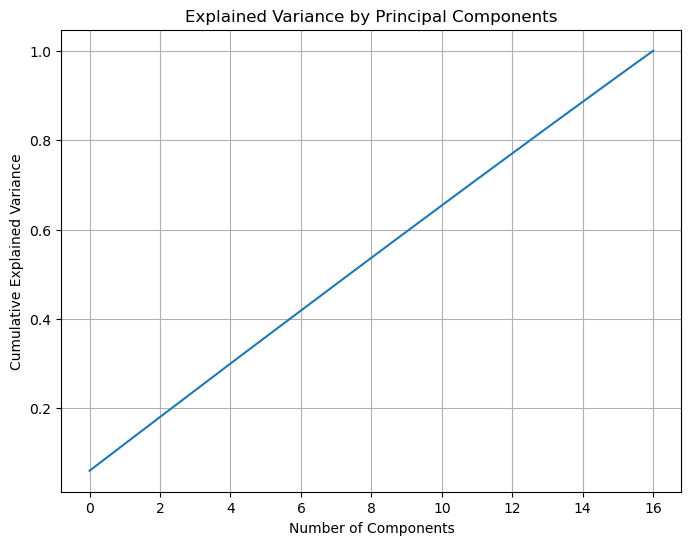

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca_train = pca.fit_transform(X_combined_new_train_scaled)
X_pca_test = pca.transform(X_combined_new_test_scaled)

# Step 3: Visualize the explained variance ratio
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [54]:
import pickle

# Save with Pickle
with open('X_combined_new_train_scaled.pkl', 'wb') as f:
    pickle.dump(X_combined_new_train_scaled, f)

with open('X_combined_new_test_scaled.pkl', 'wb') as f:
    pickle.dump(X_combined_new_test_scaled, f)

# To load the datasets later
with open('X_combined_new_train_scaled.pkl', 'rb') as f:
    X_combined_new_train_scaled = pickle.load(f)

with open('X_combined_new_test_scaled.pkl', 'rb') as f:
    X_combined_new_test_scaled = pickle.load(f)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

# Initialize and fit the model
linear_model = LinearRegression()
linear_model.fit(X_combined_new_train_scaled , y_train)

# Predictions and evaluation
predictions = linear_model.predict(X_combined_new_test_scaled )
mse = mean_squared_error(y_test, predictions)
print(f"Linear Regression - Mean Squared Error: {mse:.4f}")

Linear Regression - Mean Squared Error: 15709389.6018


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_combined_new_train_scaled , y_train)

# Predictions and evaluation
predictions = logistic_model.predict(X_combined_new_test_scaled )
accuracy = accuracy_score(y_test, predictions)
probas = logistic_model.predict_proba(X_combined_new_test_scaled )
loss = log_loss(y_test, probas)
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Log Loss: {loss:.4f}")

In [59]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_combined_new_train_scaled, y_train)

# Predictions and evaluation
predictions = naive_bayes_model.predict(X_combined_new_test_scaled)
accuracy = accuracy_score(y_test, predictions)
probas = naive_bayes_model.predict_proba(X_combined_new_test_scaled)
loss = log_loss(y_test, probas)
print(f"Naive Bayes - Accuracy: {accuracy:.4f}, Log Loss: {loss:.4f}")

Naive Bayes - Accuracy: 0.2417, Log Loss: 9.3844


In [60]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_combined_new_train_scaled , y_train)

# Predictions and evaluation
predictions = decision_tree_model.predict(X_combined_new_test_scaled )
accuracy = accuracy_score(y_test, predictions)
probas = decision_tree_model.predict_proba(X_combined_new_test_scaled )
loss = log_loss(y_test, probas)
print(f"Decision Tree - Accuracy: {accuracy:.4f}, Log Loss: {loss:.4f}")

Decision Tree - Accuracy: 0.2010, Log Loss: 28.7989


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
# Initialize and fit the model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_combined_new_train_scaled, y_train)

# Predictions and evaluation
predictions = random_forest_model.predict(X_combined_new_test_scaled)
accuracy = accuracy_score(y_test, predictions)
probas = random_forest_model.predict_proba(X_combined_new_test_scaled)
loss = log_loss(y_test, probas)
print(f"Random Forest - Accuracy: {accuracy:.4f}, Log Loss: {loss:.4f}")

Random Forest - Accuracy: 0.1942, Log Loss: 1.6393


In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_combined_new_train_scaled , y_train)

# Predictions and evaluation
predictions = knn_model.predict(X_combined_new_test_scaled )
accuracy = accuracy_score(y_test, predictions)
probas = knn_model.predict_proba(X_combined_new_test_scaled )
loss = log_loss(y_test, probas)

print(f"K-Nearest Neighbors - Accuracy: {accuracy:.4f}, Log Loss: {loss:.4f}")


K-Nearest Neighbors - Accuracy: 0.1879, Log Loss: 13.1653


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_combined_new_train_scaled )
X_test_scaled = scaler.transform(X_combined_new_test_scaled )

# Convert the data to PyTorch tensors and move to GPU if available
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)  # Use LongTensor for classification
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLP, self).__init__()
        self.hidden_layers = nn.ModuleList()
        prev_size = input_size
        
        # Create hidden layers
        for hidden_size in hidden_layers:
            self.hidden_layers.append(nn.Linear(prev_size, hidden_size))
            prev_size = hidden_size
        
        self.output_layer = nn.Linear(prev_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.relu(x)
        x = self.output_layer(x)
        return x

# Hyperparameters
input_size = X_train_tensor.shape[1]  # Number of input features
hidden_layers = [128, 64, 32]  # List of sizes for hidden layers
output_size = 5  
num_epochs = 100  # Adjust as needed
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
mlp_model = MLP(input_size, hidden_layers, output_size).to(device)
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(mlp_model.parameters(), lr=learning_rate)

# Training the MLP
for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    
    outputs = mlp_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the MLP
mlp_model.eval()
with torch.no_grad():
    test_outputs = mlp_model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)
    
    accuracy = accuracy_score(y_test, predicted.cpu().numpy())  # Move to CPU for evaluation
    probas = torch.softmax(test_outputs, dim=1).cpu().numpy()  # For log loss
    loss = log_loss(y_test, probas)
    
    print(f"Multi-Layer Perceptron - Accuracy: {accuracy:.4f}, Log Loss: {loss:.4f}")


Using device: cuda
Epoch [10/100], Loss: 1.5925
Epoch [20/100], Loss: 1.5584
Epoch [30/100], Loss: 1.5014
Epoch [40/100], Loss: 1.4322
Epoch [50/100], Loss: 1.3638
Epoch [60/100], Loss: 1.3021
Epoch [70/100], Loss: 1.2558
Epoch [80/100], Loss: 1.1973
Epoch [90/100], Loss: 1.1595
Epoch [100/100], Loss: 1.1146
Multi-Layer Perceptron - Accuracy: 0.2253, Log Loss: 2.1067
